# Motivation

Understanding the dynamics of global nutrition trends is crucial for addressing public health challenges. While undernourishment remains a significant concern in many regions, the prevalence of obesity has been steadily increasing worldwide. Exploring the parallel trajectories of these two phenomena provides valuable insights into the complex interplay of socio-economic factors, dietary habits, and lifestyle changes. By analyzing four distinct datasets, I aim to uncover patterns, correlations, and disparities between undernourishment and obesity across different regions and over time. Such insights can inform targeted interventions, policy decisions, and public health initiatives aimed at promoting balanced nutrition and combating both undernourishment and obesity on a global scale.

#  Preparation Part

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import numpy as np
from os.path import join

In [5]:
path =  "/content/gdrive/MyDrive/CS210-Proj"

# Let's dive into coding part

There are so many countries that can be taken into account. However, in this project, I aim to show the obesity part and prevalence of undernourishment part clearly. Therefore, I have especially chosen a few countries after examining datasets. These are, in general, Somalia, Mali, Russia, United States. Besides that, in some parts I took into account the World's data as well.

In [6]:
# Undernourishment data
df = pd.read_csv(join(path,"prevalence-of-undernourishment.csv"), delimiter=',')
print(df)

           Entity Code  Year  \
0     Afghanistan  AFG  2001   
1     Afghanistan  AFG  2002   
2     Afghanistan  AFG  2003   
3     Afghanistan  AFG  2004   
4     Afghanistan  AFG  2005   
...           ...  ...   ...   
4450     Zimbabwe  ZWE  2017   
4451     Zimbabwe  ZWE  2018   
4452     Zimbabwe  ZWE  2019   
4453     Zimbabwe  ZWE  2020   
4454     Zimbabwe  ZWE  2021   

      2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent  
0                                                  46.4                                    
1                                                  44.1                                    
2                                                  39.0                                    
3                                                  36.3                                    
4                                                  34.5                                    
...                                                 ...        

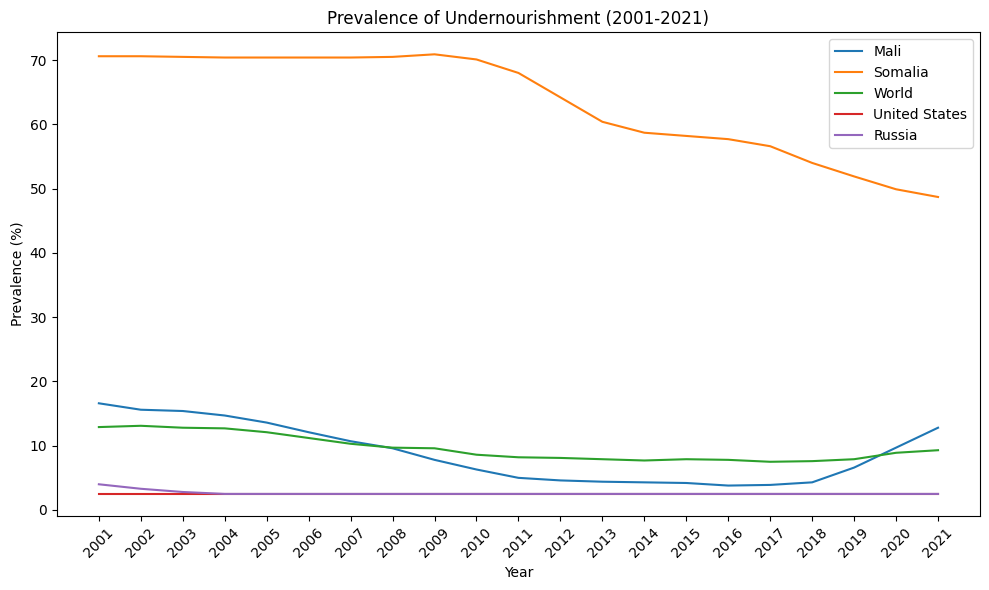

In [7]:
# indexing for wanted years.
index = [i for i in range(2001, 2022)]

mali = df[df["Entity"]=="Mali"]
mali = mali[["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]]

# did this in order to take indexes as years.
mali = pd.DataFrame(mali.values,index=index,columns=["Prevalence of undernourishment in Mali"])

somalia = df[df["Entity"]=="Somalia"]
somalia= somalia[["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]]
# did this in order to take indexes as years.
somalia = pd.DataFrame(somalia.values, index=index, columns=["Prevalence of undernourishment in Somalia"])
russia = df[df["Entity"]=="Russia"]
russia = russia["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]
# did this in order to take indexes as years.
russia = pd.DataFrame(russia.values,index=index,columns=["Russia"])


world = df[df["Entity"] == "World"]
world = world[["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]]
# did this in order to get wanted years only (in the data there were more of them, so I took the wanted range)
world = world.iloc[1:22]
# did this in order to take indexes as years.
world = pd.DataFrame(world.values,index=index,columns=["Prevalence of undernourishment in World"])

usa = df[df["Entity"]=="United States"]
usa= usa[["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]]
# did this in order to take indexes as years.
usa = pd.DataFrame(usa.values, index=index, columns=["Prevalence of undernourishment in United States"])

# plotting part for prevalence of undernourishment
plt.figure(figsize=(10, 6))
plt.plot(mali.index, mali.values, label="Mali")
plt.plot(somalia.index, somalia.values, label="Somalia")
plt.plot(world.index, world.values, label="World")
plt.plot(usa.index, usa.values, label="United States")
plt.plot(russia.index, russia.values, label="Russia")

plt.title("Prevalence of Undernourishment (2001-2021)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# now a new datafram is read
df2 = pd.read_csv(join(path,"malnutrition-death-rates.csv"),delimiter = ',')
print(df2)

           Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)  
0                                                 11.04                                
1                                                  9.93                                
2                                                  9.34                                
3                                                  9.75                                
4                                                 10.13                                
...                                                 ...                                

Let's first manipulate the data and then plot it.




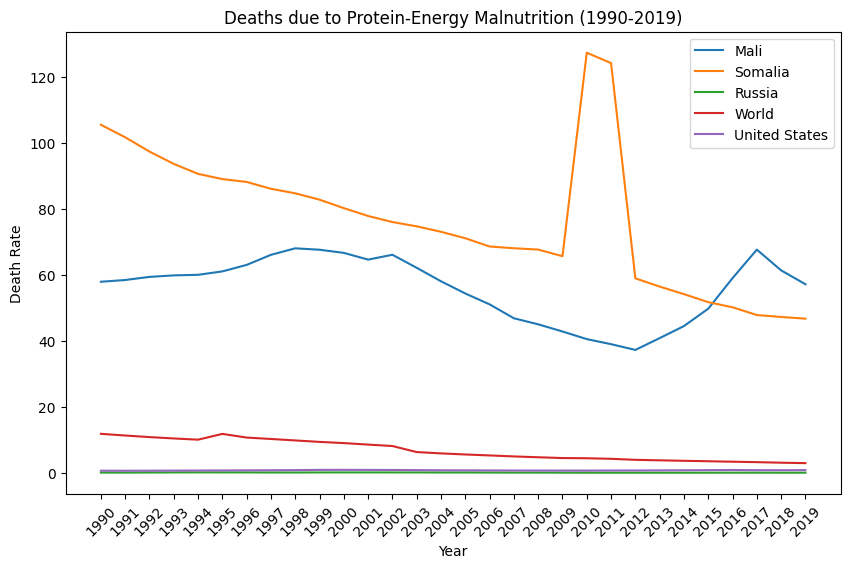

In [9]:
# in this dataset, initially I wanted to show these range of years.
index = [i for i in range(1990,2020)]


mali2 = df2[df2["Entity"]=="Mali"]
mali2 = mali2["Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)"]
# did this in order to take indexes as years.
mali2 = pd.DataFrame(mali2.values,columns=["Mali"],index =index )

somalia2 = df2[df2["Entity"]=="Somalia"]
somalia2 = somalia2["Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)"]
# did this in order to take indexes as years.
somalia2 = pd.DataFrame(somalia2.values,columns=["Somalia"],index =index )

russia2 = df2[df2["Entity"]=="Russia"]
russia2 = russia2["Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)"]
# did this in order to take indexes as years.
russia2 = pd.DataFrame(russia2.values,index=index,columns=["Russia"])

world = df2[df2["Entity"]=="World"]
world = world["Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)"]
# did this in order to take indexes as years.
world = pd.DataFrame(world.values,columns=["World"],index =index )

usa2 = df2[df2["Entity"]=="United States"]
usa2 = usa2["Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)"]
# did this in order to take indexes as years.
usa2 = pd.DataFrame(usa2.values,columns=["United States"],index =index )


# plotting part for malnutrition death rate part
plt.figure(figsize=(10, 6))

plt.plot(mali2.index, mali2.values, label="Mali")
plt.plot(somalia2.index, somalia2.values, label="Somalia")
plt.plot(russia2.index, russia2.values, label="Russia")
plt.plot(world.index, world.values, label="World")
plt.plot(usa2.index, usa2.values, label="United States")

plt.title("Deaths due to Protein-Energy Malnutrition (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.xticks(index, rotation=45)
plt.legend()
plt.show()

We are simply doing the same things for the remaining 3 datasets as well.

In [10]:
# now new dataframe is read for rate of adults (18+)
df3 = pd.read_csv(join(path,"share-of-adults-defined-as-obese.csv"),delimiter = ',')
print(df3)

           Entity Code  Year  \
0     Afghanistan  AFG  1975   
1     Afghanistan  AFG  1976   
2     Afghanistan  AFG  1977   
3     Afghanistan  AFG  1978   
4     Afghanistan  AFG  1979   
...           ...  ...   ...   
8269     Zimbabwe  ZWE  2012   
8270     Zimbabwe  ZWE  2013   
8271     Zimbabwe  ZWE  2014   
8272     Zimbabwe  ZWE  2015   
8273     Zimbabwe  ZWE  2016   

      Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years  
0                                                   0.4                                                             
1                                                   0.4                                                             
2                                                   0.5                                                             
3                                                   0.5                                                             
4                             

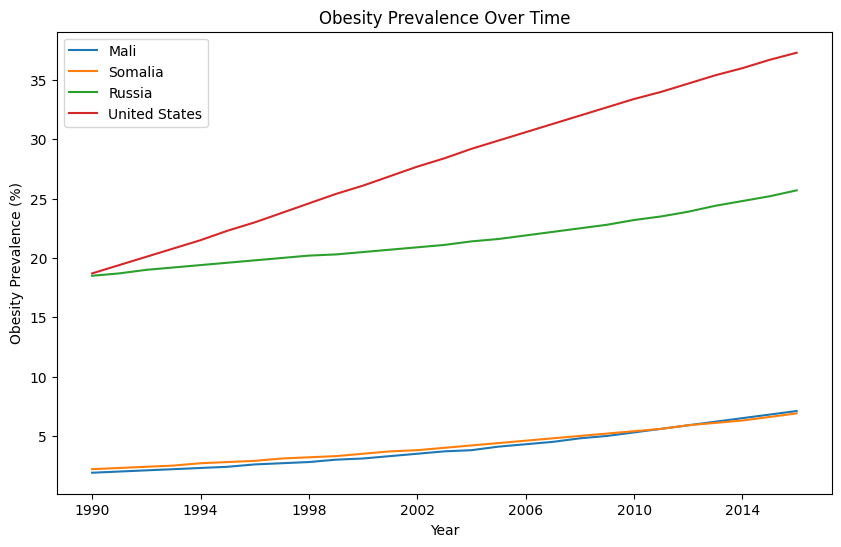

In [11]:
# here, I took the years that I wanted to emphasize, in the dataset it starts from 1975, however I did not want to go back that much to evaluate my hypothesis.
df3 = df3[df3["Year"]>=1990]
df3 = df3[df3["Year"]<=2016]

# wanted index
index = [i for i in range(1990,2017)]

mali3 = df3[df3["Entity"]=="Mali"]
mali3 = mali3["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]
# did this in order to take indexes as years.
mali3 = pd.DataFrame(mali3.values,index=index,columns=["Mali"])

somalia3 = df3[df3["Entity"]=="Somalia"]
somalia3 = somalia3["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]
# did this in order to take indexes as years.
somalia3 = pd.DataFrame(somalia3.values,index=index,columns=["Somalia"])

usa3 = df3[df3["Entity"]=="United States"]
usa3 = usa3["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]
# did this in order to take indexes as years.
usa3 = pd.DataFrame(usa3.values,index=index,columns=["United States"])

russia3 = df3[df3["Entity"]=="Russia"]
russia3 = russia3["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]
# did this in order to take indexes as years.
russia3 = pd.DataFrame(russia3.values,index=index,columns=["Russia"])


# plotting part for obesity prevalence.
plt.figure(figsize=(10,6))
plt.plot(mali3.index, mali3["Mali"], label="Mali")
plt.plot(somalia3.index, somalia3["Somalia"], label="Somalia")
plt.plot(russia3.index, russia3["Russia"],label = "Russia")
plt.plot(usa3.index, usa3["United States"], label="United States")

plt.xlabel("Year")
plt.xticks(np.arange(int(min(russia3.index)), int(max(russia3.index))+1, 4))
plt.ylabel("Obesity Prevalence (%)")
plt.title("Obesity Prevalence Over Time")
plt.legend()
plt.show()

In [12]:
# now new dataframe is read for deaths resulting from obesity by age
df4 =pd.read_csv(join(path,"deaths-from-obesity-by-age.csv"),delimiter = ',')
print(df4)

           Entity Code  Year          A          B           C         D  \
0     Afghanistan  AFG  1990  2404.4958  5579.2925  1531.95460  0.859822   
1     Afghanistan  AFG  1991  2391.3220  5551.9937  1543.78200  0.896693   
2     Afghanistan  AFG  1992  2378.5356  5546.8687  1600.58120  0.984192   
3     Afghanistan  AFG  1993  2382.5618  5577.4760  1649.03530  1.028965   
4     Afghanistan  AFG  1994  2390.6914  5610.2940  1671.23720  1.008417   
...           ...  ...   ...        ...        ...         ...       ...   
6835     Zimbabwe  ZWE  2015  1544.0370  3346.3670   744.19800  0.481821   
6836     Zimbabwe  ZWE  2016  1619.0419  3450.0588   779.02936  0.522589   
6837     Zimbabwe  ZWE  2017  1688.4441  3544.7717   812.18207  0.558744   
6838     Zimbabwe  ZWE  2018  1762.8855  3639.4980   844.57837  0.583017   
6839     Zimbabwe  ZWE  2019  1841.4631  3751.5056   881.35950  0.572428   

             E  
0     1.270053  
1     1.190767  
2     1.178171  
3     1.233531  
4 

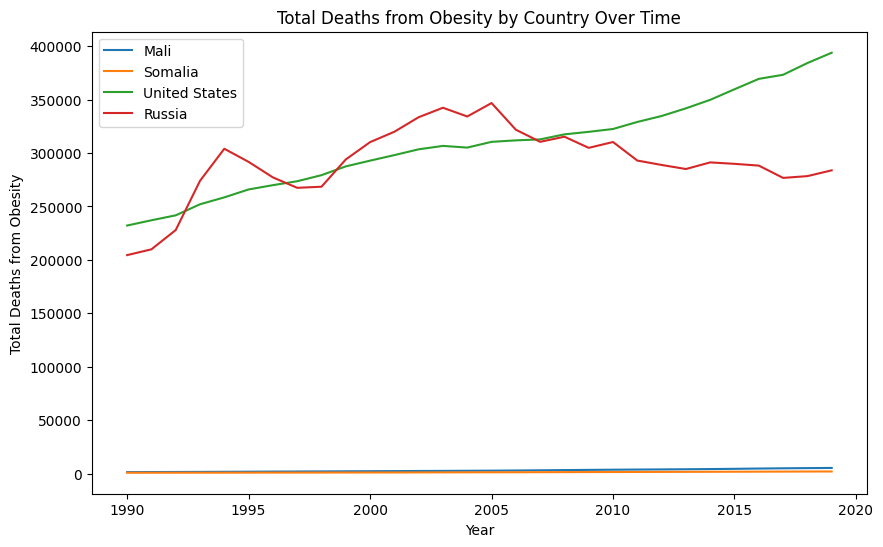

In [13]:
# In this dataset, numbers are given by age intervals (like 5-14 age interval and so on)
# However, what I'm examining is total number of them. Hence, I changed their names (age intervals) into A,B,C,D,E since it was hard to deal with them otherwise.

wanted_columns = ["Entity","A","B","C","D","E"]
df4 = df4[wanted_columns]
# this is the years that I wanted to examine.
index = [i for i in range(1990,2020)]

# here, since what I'm examining is total number of people, not by age intervals, I'm taking the total number of them by adding columns.
df4["Total"] = df4["A"]+df4["B"]+df4["C"]+df4["D"]+df4["E"]
wanted_columns = ["Entity","Total"]
df4 = df4[wanted_columns]

mali4 = df4[df4["Entity"]=="Mali"]["Total"]
# did this in order to take indexes as years.
mali4 = pd.DataFrame(mali4.values,index=index,columns=["Mali"])

somalia4 = df4[df4["Entity"]=="Somalia"]["Total"]
# did this in order to take indexes as years.
somalia4 = pd.DataFrame(somalia4.values,index=index,columns=["Somalia"])

usa4 = df4[df4["Entity"]=="United States"]["Total"]
# did this in order to take indexes as years.
usa4 = pd.DataFrame(usa4.values,index=index,columns=["United States"])

russia4 = df4[df4["Entity"]=="Russia"]["Total"]
# did this in order to take indexes as years.
russia4 = pd.DataFrame(russia4.values,index=index,columns=["Russia"])

# plotting part for number of deaths resulting from obesity
plt.figure(figsize=(10,6))
plt.plot(mali4.index, mali4["Mali"], label="Mali")
plt.plot(somalia4.index, somalia4["Somalia"], label="Somalia")
plt.plot(usa4.index, usa4["United States"], label="United States")
plt.plot(russia4.index, russia4["Russia"], label="Russia")

plt.xlabel("Year")
plt.ylabel("Total Deaths from Obesity")
plt.title("Total Deaths from Obesity by Country Over Time")
plt.legend()
plt.show()

This part is later going to be used when it comes to plotting linear regressions.

In [14]:
# this linear regression function is used just for obesity part.
def plot_linear_regression(x, y, label):
    x = np.array(x).reshape(-1, 1) # here, I'm reshaping the x so that it can fit to model.
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x) #predicting values so that we can sketch regression line.
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label=label) # original data
    plt.plot(x, y_pred, color='red', label='Linear Regression') # regression line
    plt.title(f"Linear Regression for {label}")
    plt.xlabel("Year")
    plt.ylabel("Total Deaths from Obesity")
    plt.legend()
    plt.show()

#this linear regression function is used just for undernourishment part.
def plot_linear_regression3(x, y, label):
    x = np.array(x).reshape(-1, 1) # here, I'm reshaping the x so that it can fit to model.
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x) #predicting values so that we can sketch regression line.
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label=label) # original data
    plt.plot(x, y_pred, color='red', label='Linear Regression') # regression line
    plt.title(f"Linear Regression for {label}")
    plt.xlabel("Year")
    plt.xticks(np.arange(int(min(x)), int(max(x))+1, 2)) # showing the years with 2 intervals
    plt.ylabel("Undernourishment in World (%)")
    plt.legend()
    plt.show()

# this linear regression function is used just for undernourishment in somalia part.
def plot_linear_regression2(x, y, label):
    x = np.array(x).reshape(-1, 1) # here, I'm reshaping the x so that it can fit to model.
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x) #predicting values so that we can sketch regression line.
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label=label)  # original data
    plt.plot(x, y_pred, color='red', label='Linear Regression') # regression line
    plt.title(f"Linear Regression for {label}")
    plt.xlabel("Year")
    plt.ylabel("Undernourishment Prevalence in Somalia (%)")
    plt.xticks(np.arange(int(min(x)), int(max(x))+1, 2))  # showing the years with 2 intervals
    plt.legend()
    plt.show()

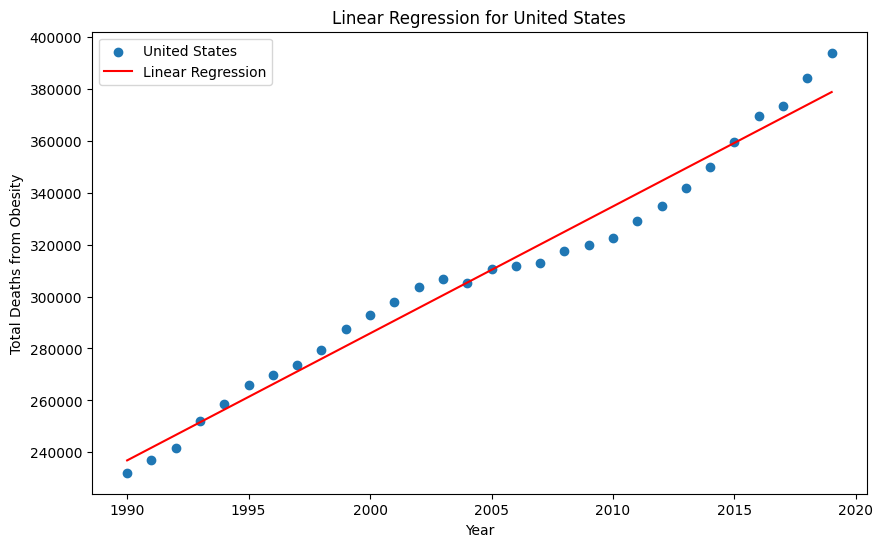

<ipython-input-14-7d3bd27ba96e>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(int(min(x)), int(max(x))+1, 2))  # showing the years with 2 intervals


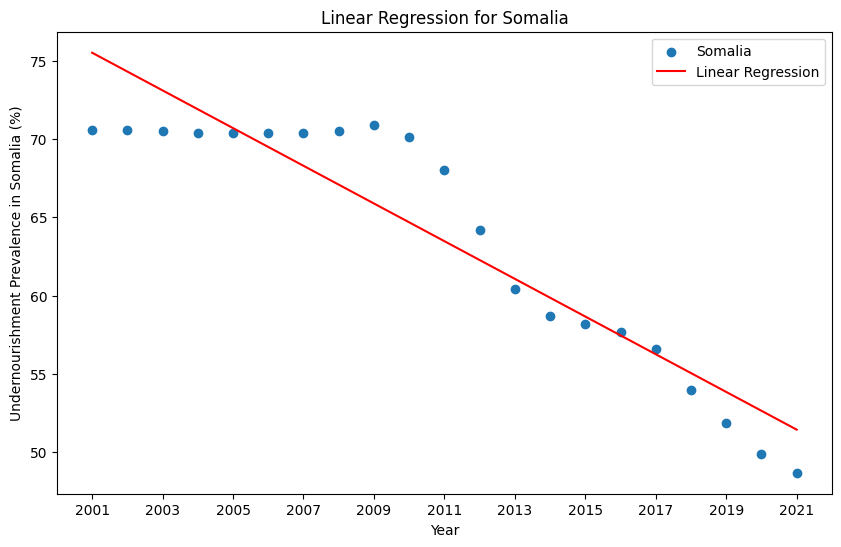

In [15]:
# linear regression for total deaths in USA
plot_linear_regression(usa4.index, usa4["United States"], "United States")

# linear regression for prevalence of undernourishment in Somalia
plot_linear_regression2(somalia.index,somalia["Prevalence of undernourishment in Somalia"],"Somalia")

Pearson correlation coefficient between USA and Somalia: -0.8363055589099526


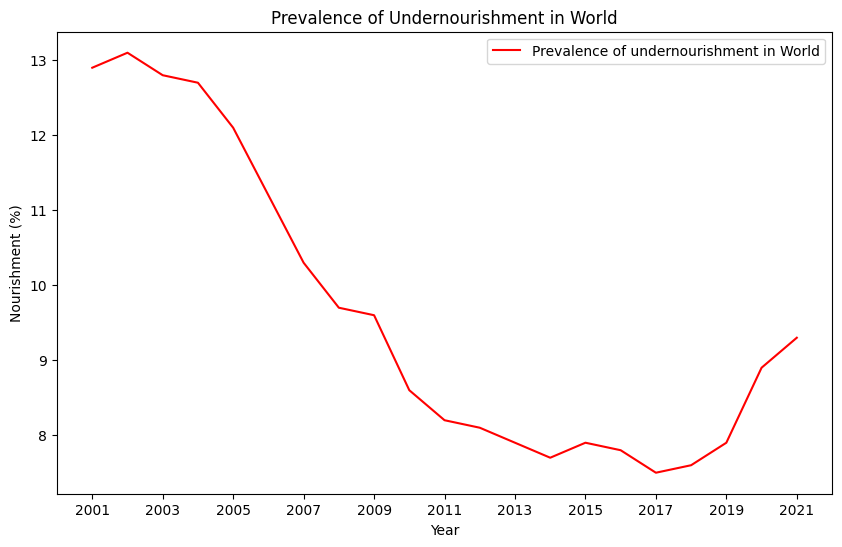

In [16]:
# here, I wanted to examine the correlation of prevalence of undernourishment in Somalia and prevalence of obesity in USA
somalia = somalia.iloc[0:16] # took years between 2001-2016
temp_usa3 = usa3 # this is gonna be used later, since I'm updating current one, I wanted to keep everything in temp_usa3
usa3 = usa3.iloc[11:] # took years between 2001-2016

# updating index so that I can use my wanted range.
index = [i for i in range(2001,2017)]

# finding correlation between them.
correlation = usa3["United States"].corr(somalia["Prevalence of undernourishment in Somalia"])
print("Pearson correlation coefficient between USA and Somalia:", correlation)

# here, I thought it would a good idea to show prevalence of undernourishment in the world, so I read the same .csv again.
df = pd.read_csv(join(path,"prevalence-of-undernourishment.csv"), delimiter=',')
world = df[df["Entity"] == "World"]

# taking the desired columsn as we do always.
world = world[["2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || Percent"]]

world = world.iloc[1:22] # took 2001-2022
index = [i for i in range(2001, 2022)] # rearranged the index part.
world = pd.DataFrame(world.values,index=index,columns=["Prevalence of undernourishment in World"])

# plotting part for prevalence of undernourishment in world.
plt.figure(figsize=(10,6))
plt.title("Prevalence of Undernourishment in World")
plt.xlabel("Year")
plt.ylabel("Nourishment (%)")
plt.plot(world.index,world["Prevalence of undernourishment in World"],color="red",label="Prevalence of undernourishment in World")
plt.xticks(np.arange(int(min(world.index)), int(max(world.index))+1, 2))
plt.legend()
plt.show()


<ipython-input-14-7d3bd27ba96e>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(np.arange(int(min(x)), int(max(x))+1, 2)) # showing the years with 2 intervals


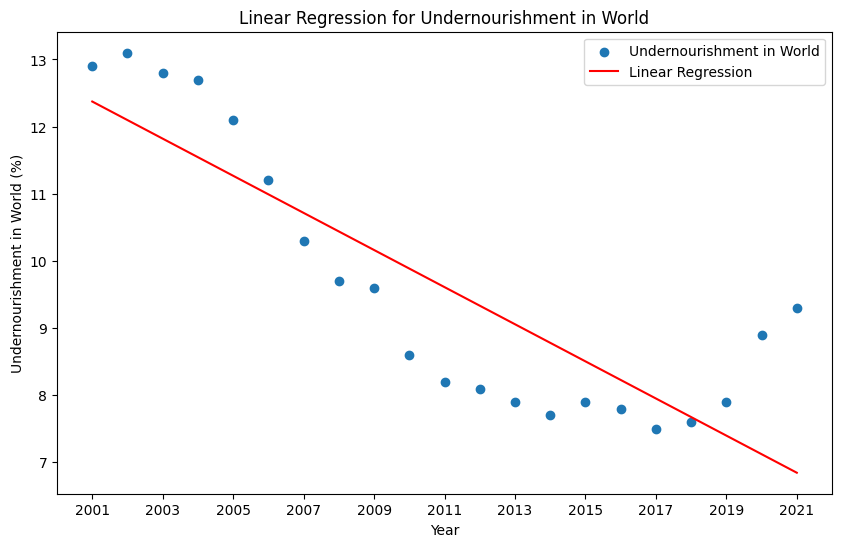

In [17]:
# linear regression for prevalence of undernourishment in the world.
plot_linear_regression3(world.index,world["Prevalence of undernourishment in World"],"Undernourishment in World")


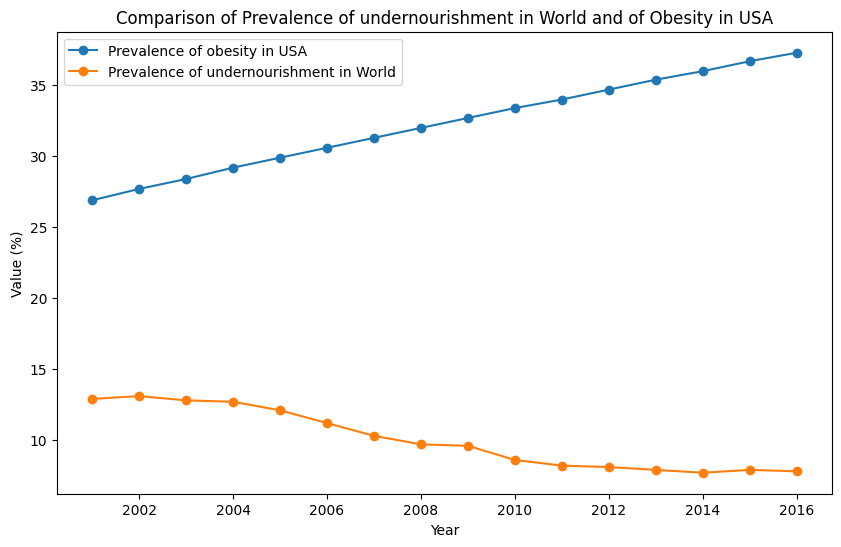

Pearson correlation coefficient between World and USA: -0.967839468219599


In [18]:
# temp_usa3 is explained beforehand, so no need further explanation.
# arranged everything so that I can examine years between 2001-2016 (since both data have only them)
temp_usa3 = temp_usa3.iloc[11:]
world = world.iloc[:16]
# here, I need this version of world later, so I'm assigning it to temp_world so that I can use later.
temp_world = world

# finding every needed values such as r_value (corr.coeff), slope, and so on.
slope, intercept, r_value, p_value, std_err = linregress(world["Prevalence of undernourishment in World"], temp_usa3["United States"])

# to show how prevalence of obesity in USA has changed whereas undernourishment in world has changed
plt.figure(figsize=(10,6))
plt.plot(temp_usa3.index, temp_usa3["United States"], label='Prevalence of obesity in USA', marker='o')
plt.plot(world.index, world["Prevalence of undernourishment in World"], label='Prevalence of undernourishment in World', marker='o')
plt.title("Comparison of Prevalence of undernourishment in World and of Obesity in USA")
plt.xlabel("Year")
plt.ylabel("Value (%)")
""" # if you want, you can have a look at the coefficients and so on on the graphic as well.
plt.text(2011, 21, f"Pearson correlation coefficient: {r_value:.3f}\n"
                     f"P value: {p_value:.3f}\n"
                     f"Standard error: {std_err:.3f}", fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))"""
plt.legend()
plt.show()

# finding correlation between them.
correlation = usa3["United States"].corr(world["Prevalence of undernourishment in World"])
print("Pearson correlation coefficient between World and USA:", correlation)

# Hypothesis Testing

In [19]:
# taking share_of_adults data into df6
df6 = df3

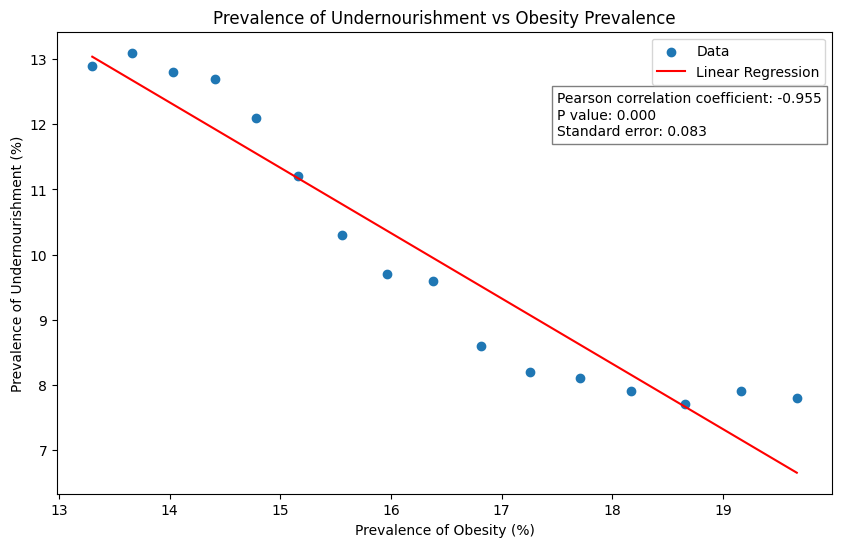

Pearson correlation coefficient: -0.9548368421442162
P value: 9.11731830185721e-09
Standard error: 0.08349560949847636


In [20]:

# there are 197 countries in total, let's sum them up.

df6 = df6[df6["Year"]>=2001]
df6 = df6[df6["Year"]<=2016]

# since in this document there is no data for world, we are creating it by grouping by year and taking the mean of every country for each year.
world = df6.groupby("Year")["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"].mean().reset_index()
world = world[["Year","Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]]
world.index = world["Year"]


# finding every needed values such as r_value (corr.coeff), slope, and so on.
slope, intercept, r_value, p_value, std_err = linregress(world["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"], temp_world["Prevalence of undernourishment in World"])

world.index = world["Year"]


x = world["Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years"]
y = temp_world["Prevalence of undernourishment in World"]

x_temporary = x
y_temporary = y

# creating linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# generating x values for the linear regression line
x_reg = np.linspace(x.min(), x.max(), 100)
y_reg = intercept + slope * x_reg

# plotting part
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_reg, y_reg, 'r', label='Linear Regression')
plt.text(17.5, 12.5, f"Pearson correlation coefficient: {r_value:.3f}\n"
                f"P value: {p_value:.3f}\n"
                f"Standard error: {std_err:.3f}", fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.title("Prevalence of Undernourishment vs Obesity Prevalence")
plt.xlabel("Prevalence of Obesity (%)")
plt.ylabel("Prevalence of Undernourishment (%)")
plt.legend()
plt.show()


# simply printing correlation coefficient, p value, and standard error
print("Pearson correlation coefficient:", r_value)
print("P value:", p_value)
print("Standard error:", std_err)

Here, we can see how strong our correlation is. These are explained in greater details in pdf file.

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import linregress, ttest_ind
import matplotlib.pyplot as plt

# Perform t-test
t_stat, t_p_value = ttest_ind(x, y)

# Print the results
print("T-test statistic:", t_stat)
print("P value of the t-test:", t_p_value)

# Results from the previous Pearson correlation
print("Pearson correlation coefficient:", r_value)
print("P value:", p_value)
print("Standard error:", std_err)


T-test statistic: 8.571464329310436
P value of the t-test: 1.456563270708865e-09
Pearson correlation coefficient: -0.9548368421442162
P value: 9.11731830185721e-09
Standard error: 0.08349560949847636


In [22]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation
spearman_corr, spearman_p_value = spearmanr(x, y)

# Print results
print("Spearman correlation coefficient:", spearman_corr)
print("P value:", spearman_p_value)

# Results from the previous Pearson correlation
print("Pearson correlation coefficient:", r_value)
print("P value:", p_value)
print("Standard error:", std_err)

Spearman correlation coefficient: -0.9860193986563108
P value: 2.697957134026257e-12
Pearson correlation coefficient: -0.9548368421442162
P value: 9.11731830185721e-09
Standard error: 0.08349560949847636


In [23]:
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation
kendall_corr, kendall_p_value = kendalltau(x, y)

# Print results
print("Kendall's Tau correlation coefficient:", kendall_corr)
print("P value:", kendall_p_value)

# Results from the previous Pearson correlation
print("Pearson correlation coefficient:", r_value)
print("P value:", p_value)
print("Standard error:", std_err)

Kendall's Tau correlation coefficient: -0.9456149718939671
P value: 3.5298408895585125e-07
Pearson correlation coefficient: -0.9548368421442162
P value: 9.11731830185721e-09
Standard error: 0.08349560949847636


# **Machine Learning Part**


In [24]:
df_x = x_temporary.reset_index(name="Percentage")
df_y = y_temporary.reset_index(name="Percentage")
df_y.rename(columns={"index":"Year"},inplace=True)

merged_data = pd.merge(df_x,df_y,on="Year")
merged_data.rename(columns={"Percentage_x":"Obesity","Percentage_y":"Undernourishment"},inplace=True)
merged_data

,Year,Obesity,Undernourishment
0,2001,13.301523,12.9
1,2002,13.660914,13.1
2,2003,14.028426,12.8
3,2004,14.406091,12.7
4,2005,14.779695,12.1
5,2006,15.160914,11.2
6,2007,15.556853,10.3
7,2008,15.965990,9.7
8,2009,16.377157,9.6
9,2010,16.812183,8.6


In [25]:
from sklearn.model_selection import train_test_split
X = merged_data[["Obesity"]]
y = merged_data['Undernourishment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize variables to track the best model and its performance
best_knn_model = None
best_knn_mse = float('inf')
best_n_neighbors = 0

# Perform cross-validation for each kNN model
for i in range(2, 13):
    knn = KNeighborsRegressor(n_neighbors=i)

    # Perform cross-validation and compute the negative mean squared error for each fold
    # `scoring='neg_mean_squared_error'` returns negative values, hence take the negative to get positive MSE
    mse_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')

    # Compute the average MSE across all folds
    avg_knn_mse = np.mean(mse_scores)
    print(f'kNN Mean Squared Error for {i} number of neighbors with 5-fold cross-validation: {avg_knn_mse}')

    # Update the best model if the current model is better
    if avg_knn_mse < best_knn_mse:
        best_knn_mse = avg_knn_mse
        best_knn_model = knn
        best_n_neighbors = i

print("\nBest kNN Model")
print(f'Number of Neighbors: {best_n_neighbors}')
print(f'Mean Squared Error: {best_knn_mse}')

# Train the best kNN model on the entire dataset
best_knn_model.fit(X, y)

kNN Mean Squared Error for 2 number of neighbors with 5-fold cross-validation: 0.5201666666666679
kNN Mean Squared Error for 3 number of neighbors with 5-fold cross-validation: 0.9103888888888909
kNN Mean Squared Error for 4 number of neighbors with 5-fold cross-validation: 0.9602916666666672
kNN Mean Squared Error for 5 number of neighbors with 5-fold cross-validation: 1.3970066666666674
kNN Mean Squared Error for 6 number of neighbors with 5-fold cross-validation: 1.6696481481481478
kNN Mean Squared Error for 7 number of neighbors with 5-fold cross-validation: 2.300404761904761
kNN Mean Squared Error for 8 number of neighbors with 5-fold cross-validation: 2.7493020833333333
kNN Mean Squared Error for 9 number of neighbors with 5-fold cross-validation: 3.5438991769547306
kNN Mean Squared Error for 10 number of neighbors with 5-fold cross-validation: 4.418519999999999
kNN Mean Squared Error for 11 number of neighbors with 5-fold cross-validation: 5.042670798898067
kNN Mean Squared Erro

KNeighborsRegressor(n_neighbors=2)

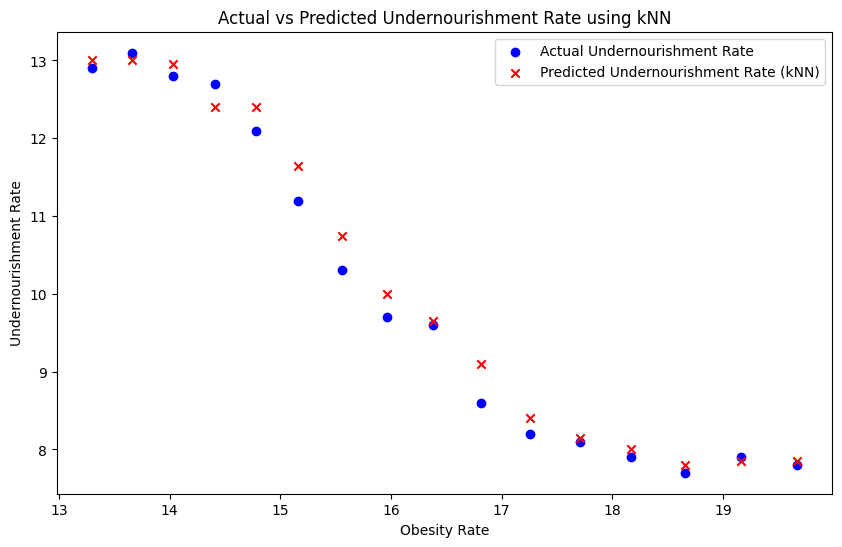

In [37]:
import matplotlib.pyplot as plt

# Make predictions on the entire dataset using the best kNN model
knn_predictions = best_knn_model.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Undernourishment Rate')
plt.scatter(X, knn_predictions, color='red', marker='x', label='Predicted Undernourishment Rate (kNN)')
plt.xlabel('Obesity Rate')
plt.ylabel('Undernourishment Rate')
plt.title('Actual vs Predicted Undernourishment Rate using kNN')
plt.legend()
plt.show()



Effect of Number of Neighbors (k):

*   General Trend: As the number of neighbors increases, the Mean Squared Error (MSE) generally tends to increase as well. This is because using more neighbors can lead to a smoother decision boundary, which might oversimplify the model and result in higher errors.

*   Initial Observation: Initially, with a small number of neighbors (e.g., 2 or 3), the model might overfit the training data, resulting in low MSE.

*   Optimal Range: However, as you increase k beyond an optimal value, the model starts to underfit the data, leading to higher MSE. In this case, the optimal value of k appears to be lower, as indicated by the lowest MSE achieved with a smaller number of neighbors.

*   Interpretation: The observed trend suggests that for this dataset, using a lower value of k in the kNN model leads to better performance in terms of predicting undernourishment rates based on obesity rates. This implies that the model benefits from considering fewer neighbors for making predictions, possibly capturing more localized patterns in the data.





In [27]:
merged_data

,Year,Obesity,Undernourishment
0,2001,13.301523,12.9
1,2002,13.660914,13.1
2,2003,14.028426,12.8
3,2004,14.406091,12.7
4,2005,14.779695,12.1
5,2006,15.160914,11.2
6,2007,15.556853,10.3
7,2008,15.965990,9.7
8,2009,16.377157,9.6
9,2010,16.812183,8.6


Random Forest Mean Squared Error with 5-fold cross-validation: 0.5101380000000051
Standard Deviation of MSE: 0.5888945243503029
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


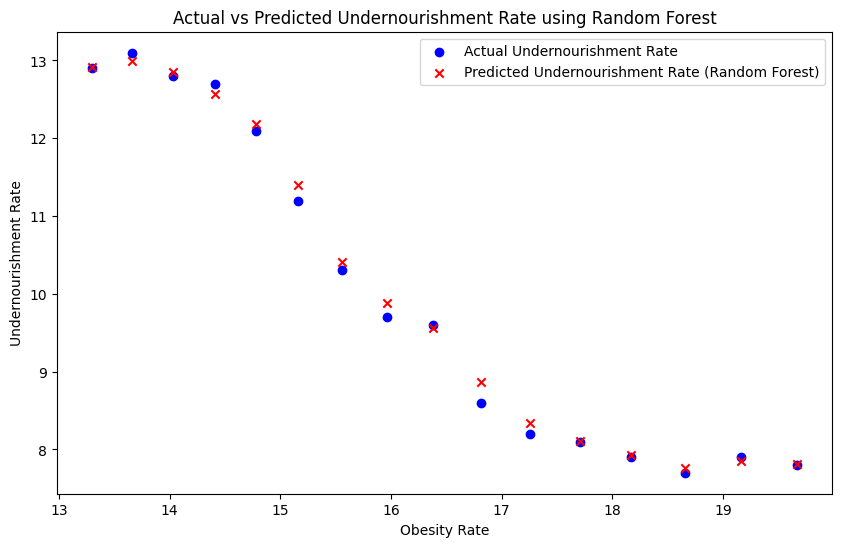

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter optimization with RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X, y)

# Obtain the best model
best_rf = random_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Compute the mean and standard deviation of the MSE
mean_cv_mse = -np.mean(cv_scores)
std_cv_mse = np.std(cv_scores)

print(f'Random Forest Mean Squared Error with 5-fold cross-validation: {mean_cv_mse}')
print(f'Standard Deviation of MSE: {std_cv_mse}')
print(f'Best Parameters: {random_search.best_params_}')

# Train the best Random Forest model on the entire dataset
best_rf.fit(X, y)

# Predict on the entire dataset using the best Random Forest model
rf_predictions = best_rf.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Undernourishment Rate')
plt.scatter(X, rf_predictions, color='red', marker='x', label='Predicted Undernourishment Rate (Random Forest)')
plt.xlabel('Obesity Rate')
plt.ylabel('Undernourishment Rate')
plt.title('Actual vs Predicted Undernourishment Rate using Random Forest')
plt.legend()
plt.show()


# Effect of Hyperparameters in Random Forest Regressor:
## Number of Trees (n_estimators = 200):

*   Using 200 trees in the Random Forest helps capture a high level of detail and complexity from the data, reducing the model's bias. The large number of trees leads to more stable and accurate predictions by averaging the results of multiple trees. This has contributed to a lower Mean Squared Error (MSE) of mean_cv_mse, indicating that the model is well-tuned.

## Maximum Depth of Trees (max_depth = 30):

*   With a maximum depth of 30, the trees in the forest can grow quite deep, allowing the model to learn complex relationships in the data. This depth ensures that the model captures intricate patterns and reduces bias. However, setting the depth to 30 also risks overfitting, but in this case, the model seems to handle it well, as reflected in the low MSE.

## Minimum Samples Required to Split an Internal Node (min_samples_split = 2):

*   The parameter value of 2 means that any node with at least 2 samples will be split. This low value allows the trees to grow very deep and complex, capturing more detailed patterns in the training data. While this can lead to overfitting, the combination with other hyperparameters seems to balance it well, maintaining a low MSE.

##Minimum Samples Required at a Leaf Node (min_samples_leaf = 1):

*    Setting min_samples_leaf to 1 means that each leaf node can contain as few as a single sample. This setting ensures that the model captures fine-grained details in the data, allowing the trees to model the training data very closely. While this can also lead to overfitting, the overall model performance indicates that it successfully generalizes to the test data.


In [41]:
# Function to predict undernourishment based on a given obesity rate using the best kNN model
def predict_undernourishment_knn(obesity_rate, model=best_knn_model):
    # Convert the obesity rate to the format expected by the model
    obesity_rate_array = np.array(obesity_rate).reshape(-1, 1)
    # Use the model to predict the undernourishment rate
    predicted_undernourishment = model.predict(obesity_rate_array)
    return predicted_undernourishment

# Example usage:
new_obesity_rate = 20  # example new obesity rate
predicted_undernourishment_knn = predict_undernourishment_knn(new_obesity_rate)
print(f'Predicted undernourishment rate for an obesity rate of {new_obesity_rate} using the best kNN model: {predicted_undernourishment_knn[0]}')

Predicted undernourishment rate for an obesity rate of 20 using the best kNN model: 7.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [40]:
# Function to predict undernourishment based on a given obesity rate
def predict_undernourishment(obesity_rate, model=best_rf):
    # Convert the obesity rate to the format expected by the model
    obesity_rate_array = np.array(obesity_rate).reshape(-1, 1)
    # Use the model to predict the undernourishment rate
    predicted_undernourishment = model.predict(obesity_rate_array)
    return predicted_undernourishment

# Example usage:
new_obesity_rate = 20  # example new obesity rate
predicted_undernourishment = predict_undernourishment(new_obesity_rate)
print(f'Predicted undernourishment rate for an obesity rate of {new_obesity_rate}: {predicted_undernourishment[0]}')


Predicted undernourishment rate for an obesity rate of 20: 7.812499999999993


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In this analysis, we aimed to predict the prevalence of undernourishment given the prevalence of obesity using two different regression models: k-Nearest Neighbors (kNN) and Random Forest. After evaluating both models based on their Mean Squared Error (MSE), we observed slight differences in their performance.

#Model Comparison and Evaluation
## 1 - k-Nearest Neighbors (kNN) Regression:

*   Training and Evaluation: We trained multiple kNN models with different values for the number of neighbors (k ranging from 2 to 12).

*   Performance Measurement: The performance of each kNN model was evaluated using the Mean Squared Error (MSE) with 5-fold cross-validation. This approach ensures that the model's performance is assessed across different subsets of the data, providing a more robust evaluation.

*   Best Model Identification: Among the various configurations, the kNN model with 2 neighbors achieved the lowest average MSE of 0.5202, making it the best-performing kNN model.

## 2 - Decision Tree Regression:

*    Training and Evaluation: We trained multiple Random Forest models with various combinations of hyperparameters, including the number of estimators (n_estimators), maximum depth (max_depth), minimum samples split (min_samples_split), and minimum samples leaf (min_samples_leaf).

*    Hyperparameter Optimization: Using RandomizedSearchCV, we optimized the hyperparameters to find the best configuration.

*    Performance Measurement: The best Random Forest model, identified with n_estimators = 200, max_depth = 30, min_samples_split = 2, and min_samples_leaf = 1, achieved an MSE of 0.5101 with a standard deviation of 0.5889 on the 5-fold cross-validation.

## Results and Interpretation

Upon comparing the MSE values from both models, it was found that the best Random Forest model had a slightly lower MSE compared to the best kNN model. This indicates that the Random Forest model provided predictions slightly closer to the actual undernourishment rates in the test dataset.

## Practical Implication
In practice, this implies that when utilizing the Random Forest model to forecast the prevalence of undernourishment corresponding to a given obesity rate, we can anticipate more precise and dependable predictions compared to the kNN model. Such accuracy holds significant importance for policymakers and healthcare professionals who heavily rely on these forecasts to formulate well-informed decisions concerning resource allocation and intervention strategies aimed at addressing undernourishment.

## Example Prediction
To illustrate, let's consider a scenario where the obesity rate stands at 20%. Utilizing the best-performing kNN model, the predicted undernourishment rate was 7.85%. Conversely, with the best-performing Random Forest model, the predicted undernourishment rate was 7.81%. Despite the slight difference in predicted values, the Random Forest model's lower MSE suggests a higher level of accuracy.

## Conclusion:
While both models offer viable means to predict undernourishment rates based on obesity rates, the Random Forest model exhibits better performance with a notably lower MSE. Hence, for this specific task, the Random Forest model is preferred due to its heightened accuracy and reliability as inferred from the lower MSE. Such findings play a crucial role in formulating precise and effective strategies to combat undernourishment.